<a href="https://colab.research.google.com/github/MCalabroCode/Analytics_project/blob/main/main_sim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
project_path = "/content/drive/MyDrive/Colab_Notebooks/Codes/project_geospatial/sim_study2/"
if project_path not in sys.path:
    sys.path.append(project_path)

from indexes_code import *
from sim_utils import *

print("✅ Moduli importati correttamente da Google Drive!")

✅ Moduli importati correttamente da Google Drive!


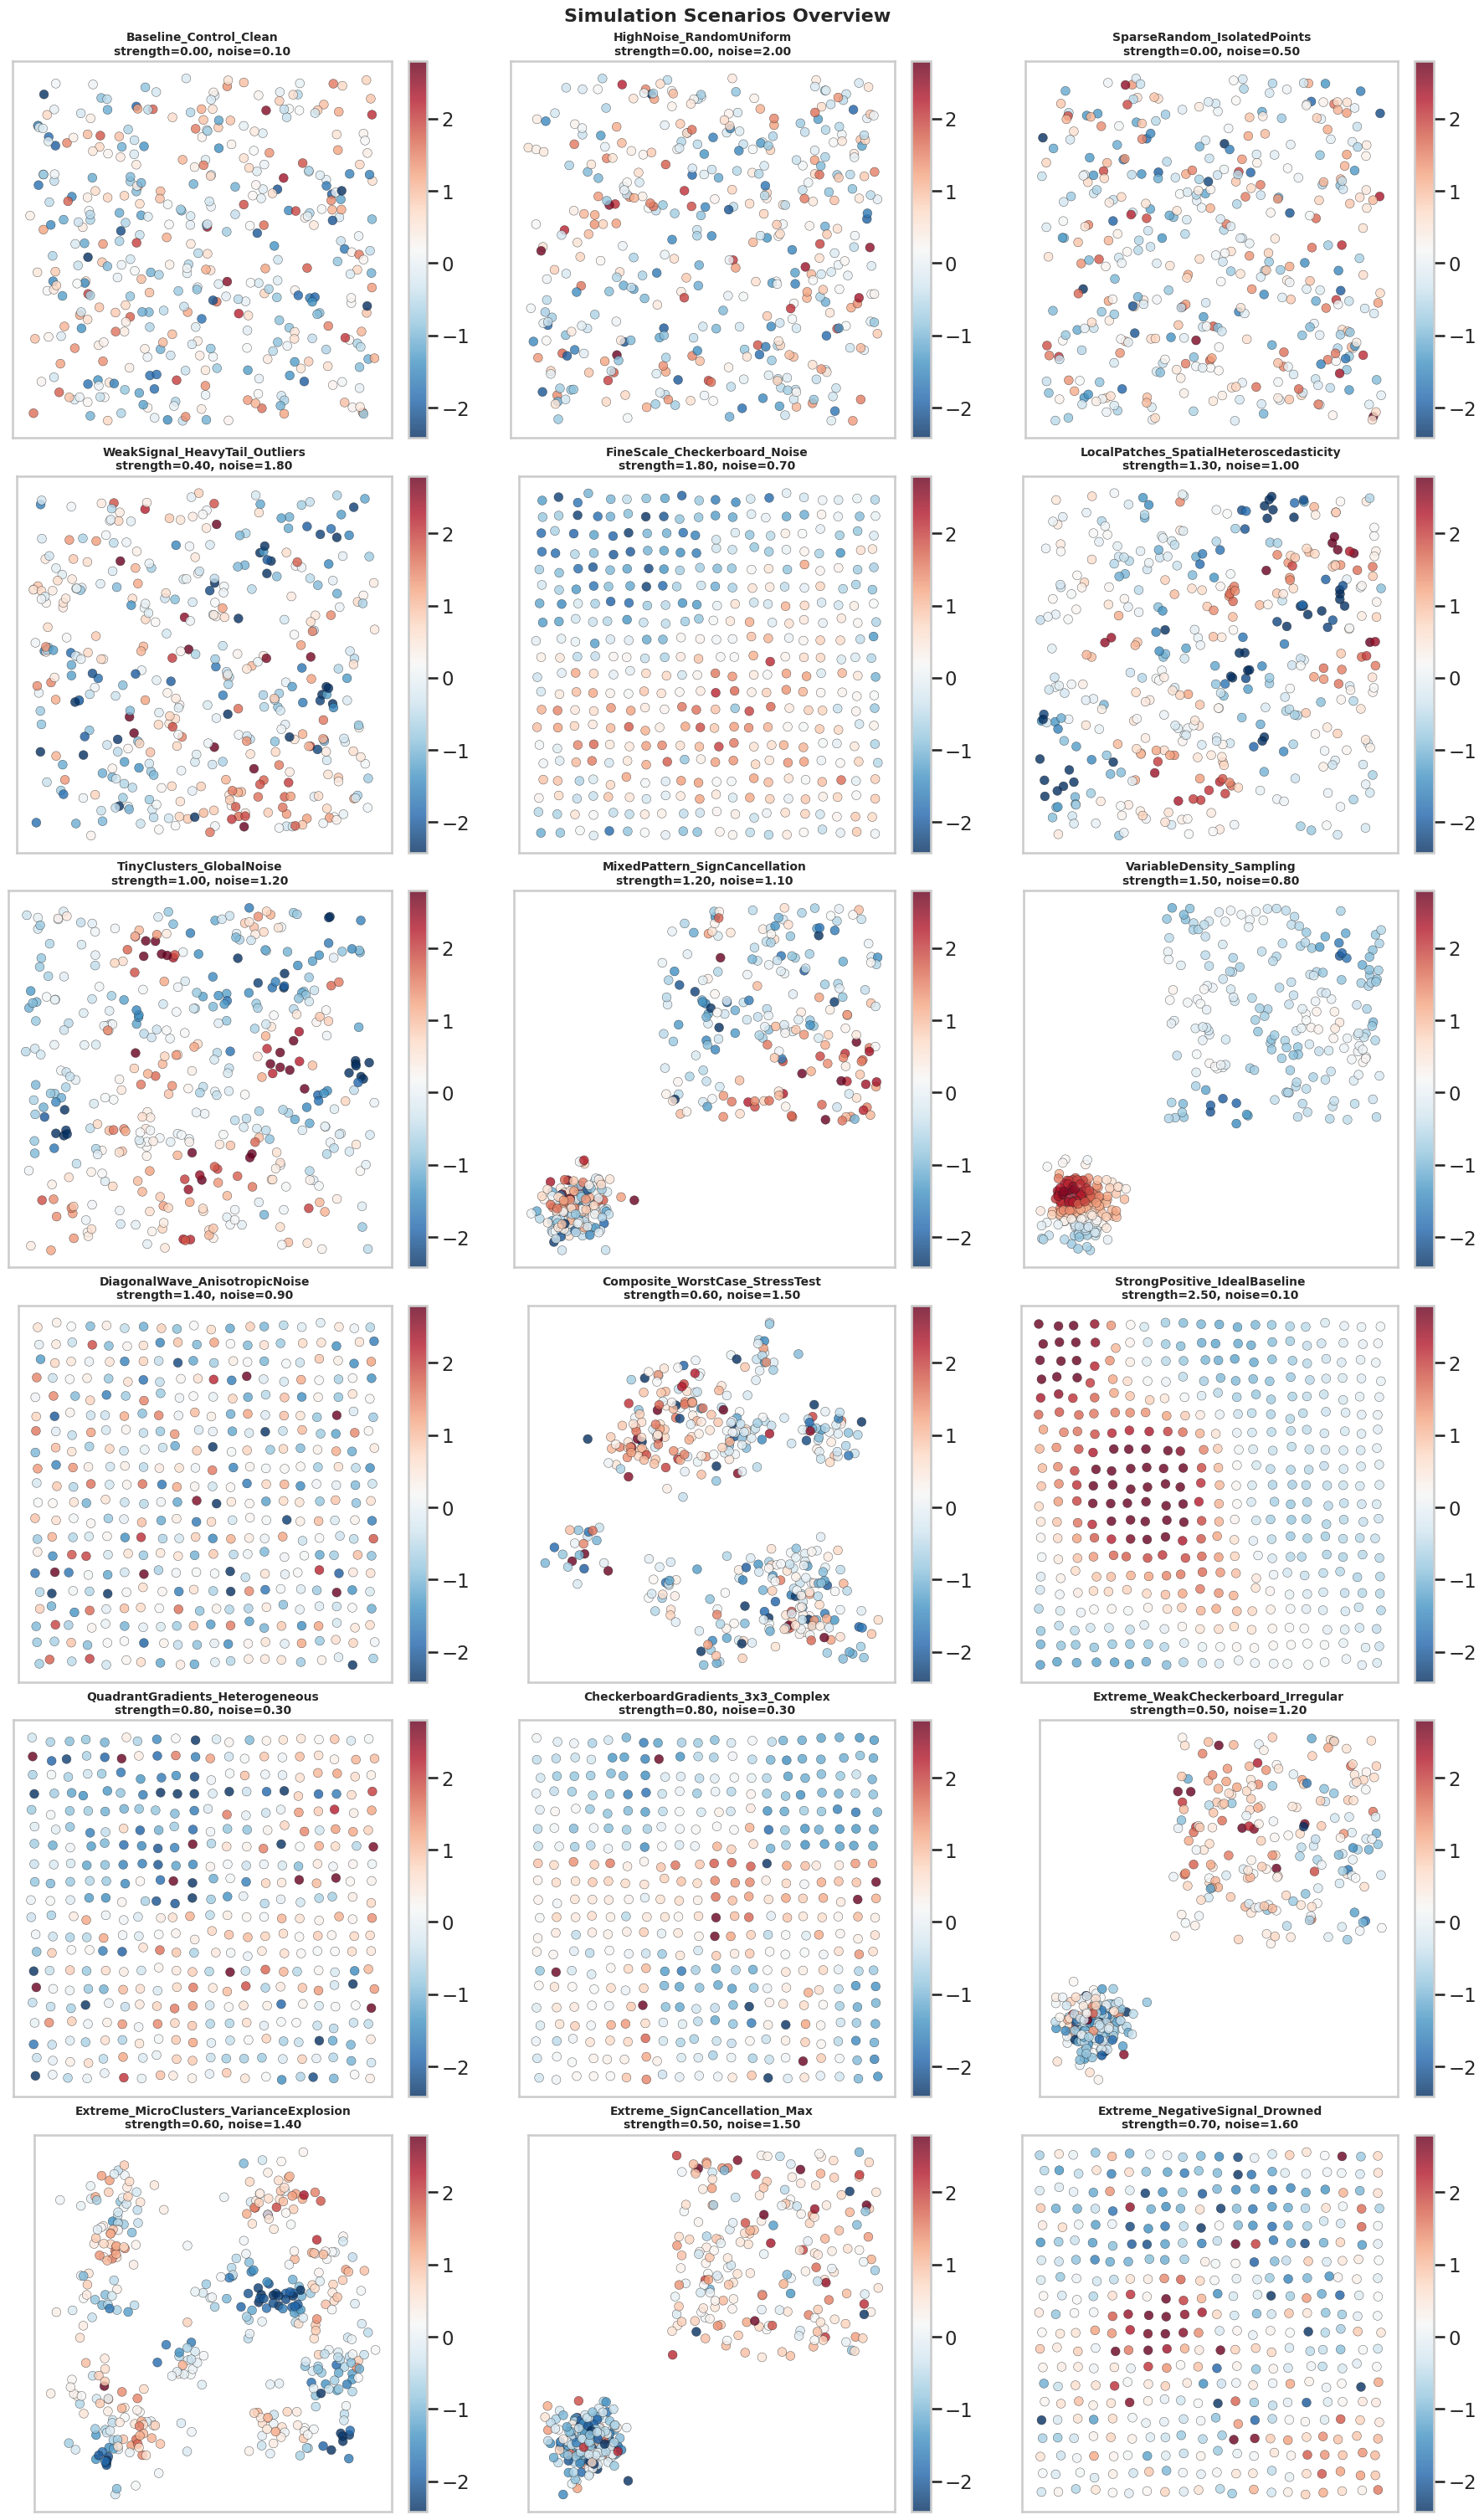

Extreme_NegativeSignal_Drowned: 100%|██████████| 20/20 [06:38<00:00, 19.91s/it]



STATISTICAL POWER BY SCENARIO (Preview)
                                         AZ_Whiteness  Geary_C  Moran_I true_autocorr  strength  noise           pattern outliers noise_type  mean_power scenario
TinyClusters_GlobalNoise                       1.0000   1.0000   1.0000        patchy       1.0    1.2            random     True   gaussian    1.000000      NaN
VariableDensity_Sampling                       1.0000   1.0000   1.0000        patchy       1.5    0.8  variable_density    False   gaussian    1.000000      NaN
LocalPatches_SpatialHeteroscedasticity         1.0000   1.0000   1.0000        patchy       1.3    1.0            random    False  t_student    1.000000      NaN
StrongPositive_IdealBaseline                   1.0000   1.0000   1.0000      positive       2.5    0.1              grid    False   gaussian    1.000000      NaN
Extreme_MicroClusters_VarianceExplosion        1.0000   0.9968   1.0000        patchy       0.6    1.4         clustered     True  t_student    0.998

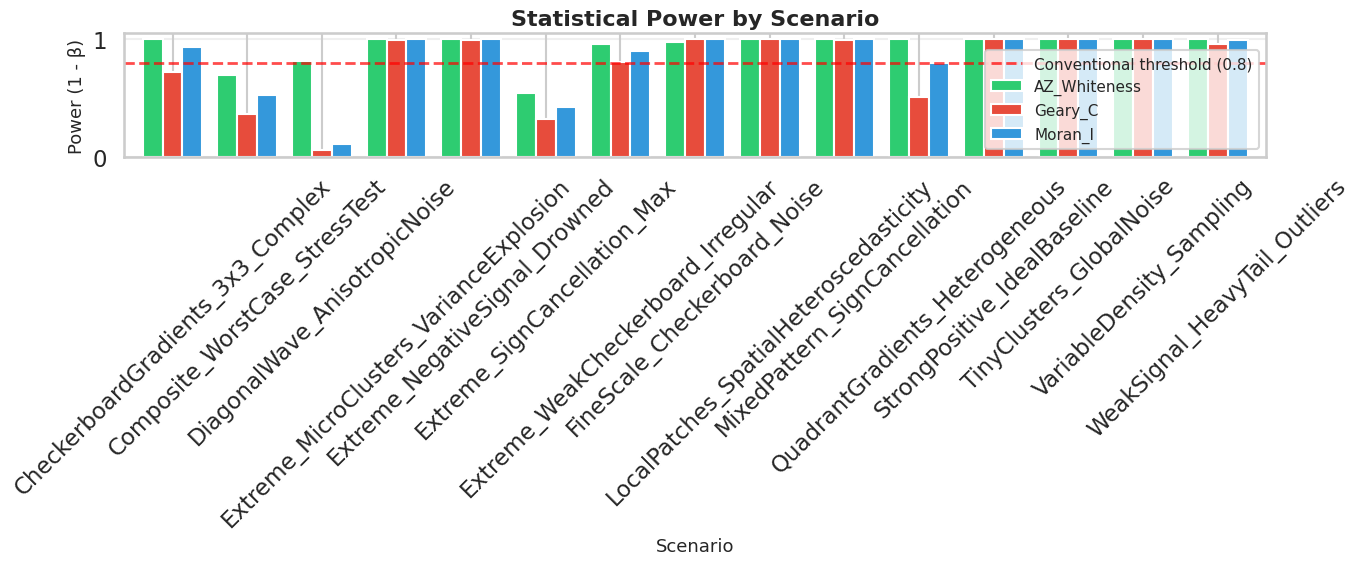

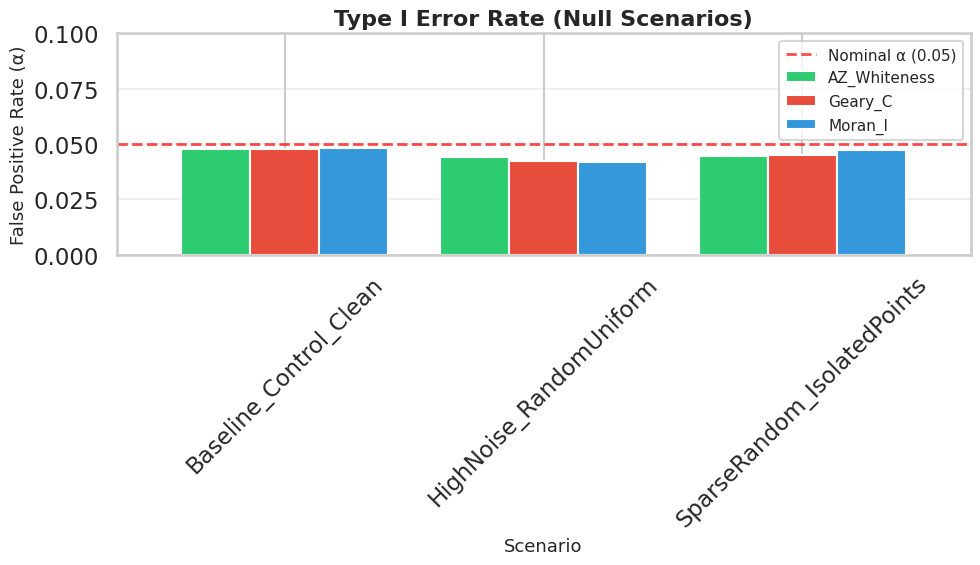

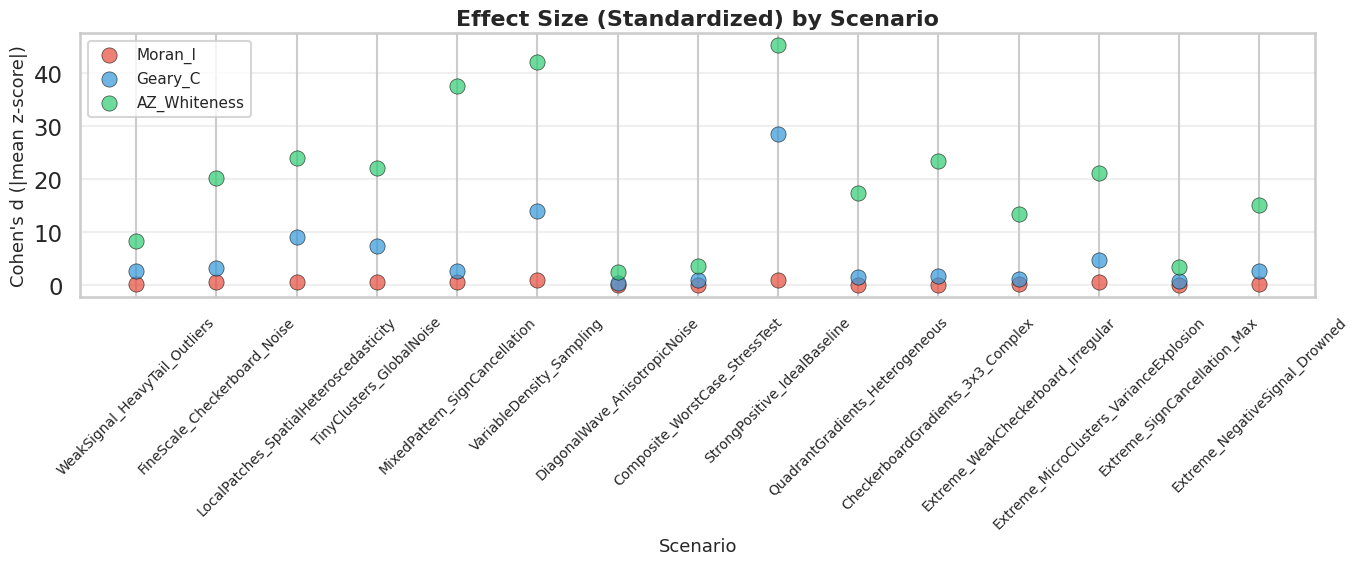

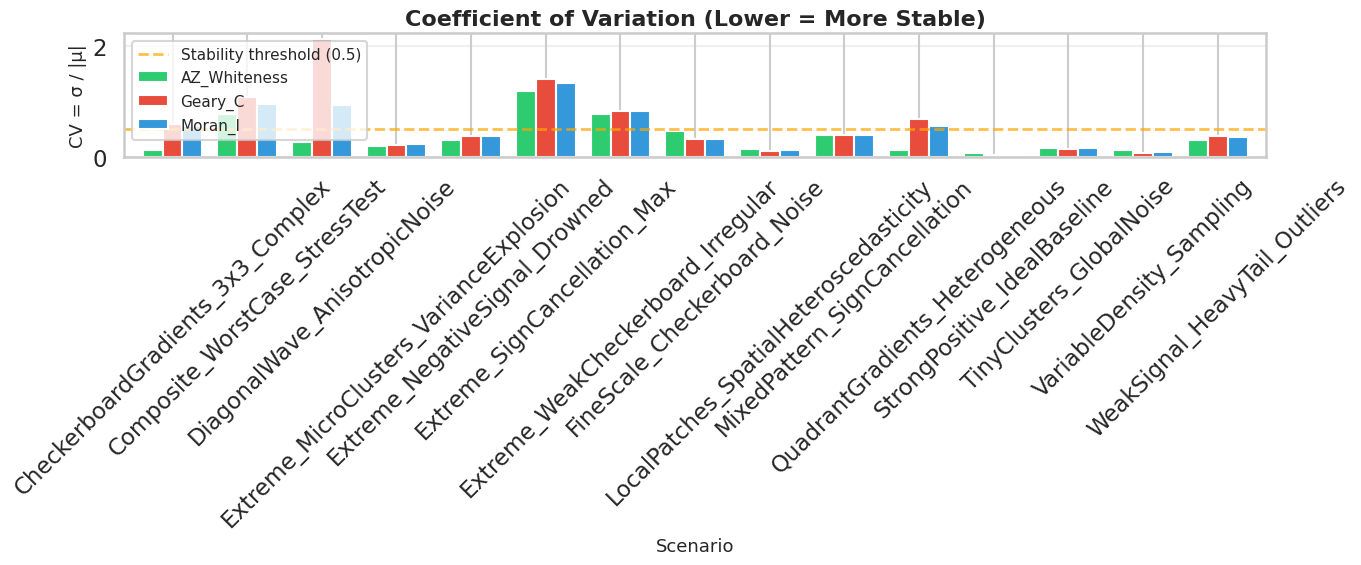

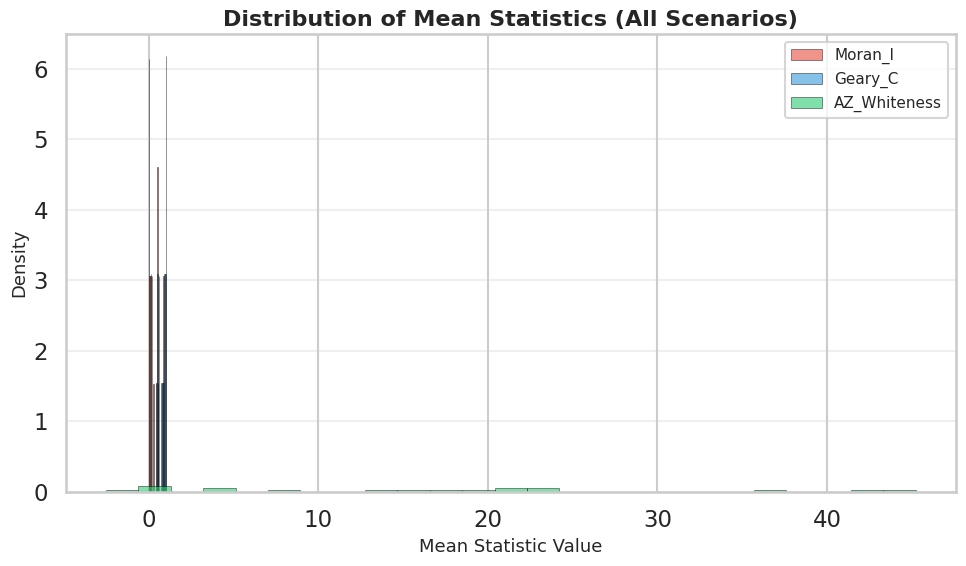

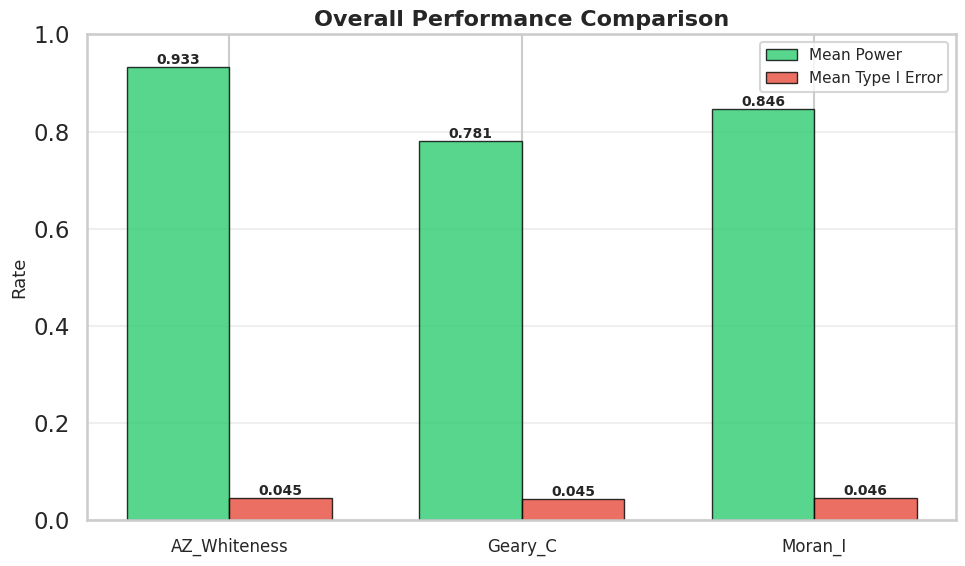

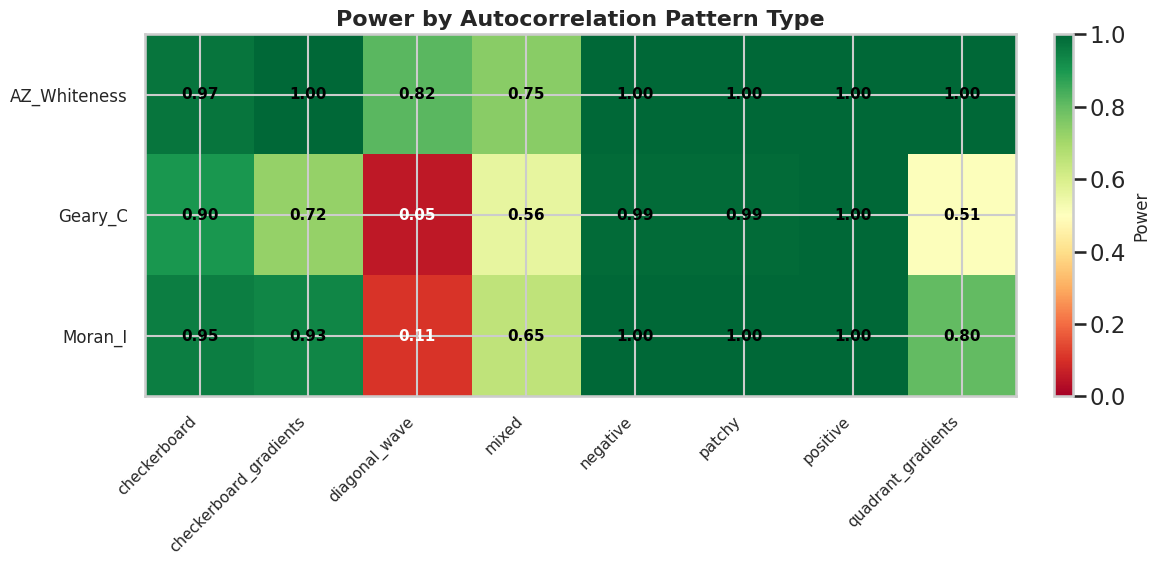

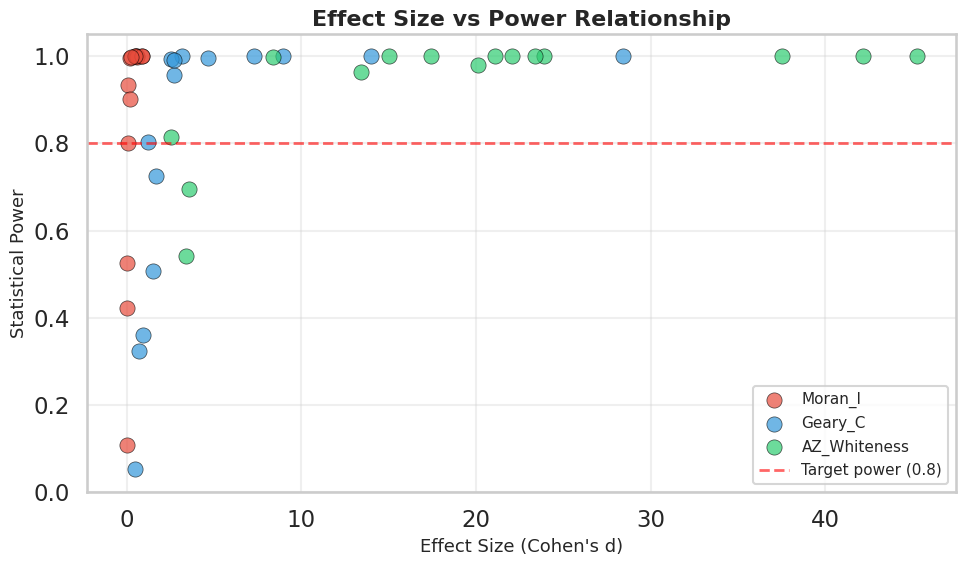

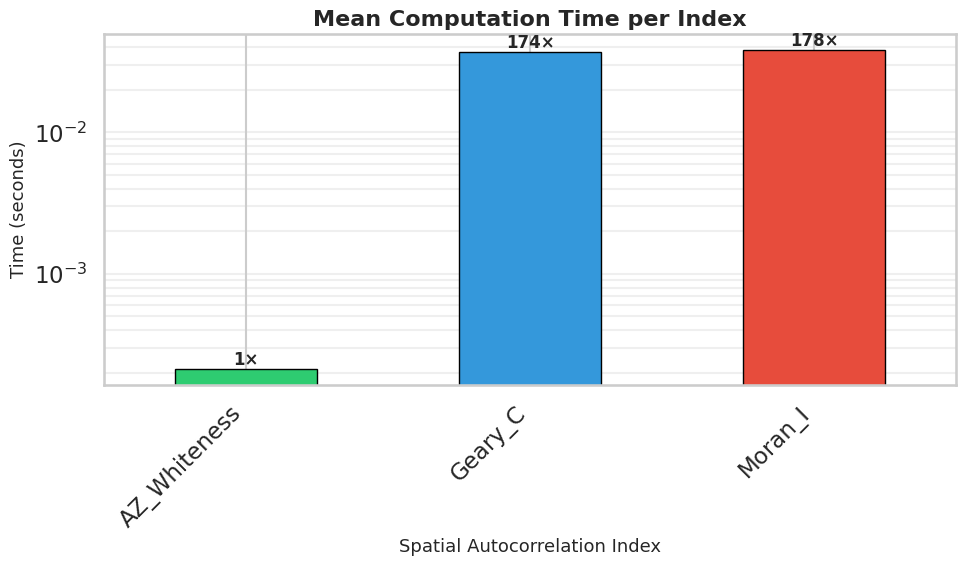


SIMULATION STUDY: FINAL RESULTS SUMMARY

📊 STATISTICAL POWER (Scenarios with True Autocorrelation)
--------------------------------------------------------------------------------
Higher values indicate better detection of spatial patterns

                  Mean   Std Dev     Min  Max
index                                        
AZ_Whiteness  0.932907  0.139189  0.5420  1.0
Geary_C       0.780680  0.316197  0.0538  1.0
Moran_I       0.845800  0.273961  0.1074  1.0

⚠️  TYPE I ERROR RATE (Null Hypothesis Scenarios)
--------------------------------------------------------------------------------
Should be close to nominal α=0.05 (good calibration)

                  Mean   Std Dev     Min     Max
index                                           
AZ_Whiteness  0.045400  0.001908  0.0442  0.0476
Geary_C       0.045000  0.002800  0.0422  0.0478
Moran_I       0.045733  0.003420  0.0418  0.0480

⏱️  COMPUTATIONAL EFFICIENCY (seconds per test)
------------------------------------------------

In [ ]:
simulated_scenarios = [
    # ========================================================================
    # NULL HYPOTHESIS (Baseline References)
    # ========================================================================
    {
        'name': 'Baseline_Control_Clean',
        'description': 'Null model with spatial randomness and low Gaussian noise, '
                       'serving as a Type I error benchmark.',
        'autocorr': 'none',
        'strength': 0,
        'pattern': 'random',
        'noise': 0.1
    },
    {
    'name': 'HighNoise_RandomUniform',
    'description': 'Completely random spatial field drawn from a uniform distribution with high noise, '
                   'used to assess false positives under extreme variance.',
    'autocorr': 'none',
    'strength': 0,
    'pattern': 'random',
    'noise': 2.0,
    'noise_type': 'uniform'
   },
   {
    'name': 'SparseRandom_IsolatedPoints',
    'description': 'Randomly distributed points with sporadic outliers, no spatial correlation, '
                   'to check susceptibility a falsi positivi da singoli valori estremi.',
    'autocorr': 'none',
    'strength': 0,
    'pattern': 'random',
    'noise': 0.5,
    'outliers': True,
    'noise_type': 'gaussian'
    },

    # ========================================================================
    # MODERATE COMPLEXITY SCENARIOS (Statistical Robustness Assessment)
    # ========================================================================

    {
        'name': 'WeakSignal_HeavyTail_Outliers',
        'description': 'Weakly autocorrelated signal obscured by heavy-tailed t-distributed noise '
                       'and extreme outliers, designed to test robustness to non-Gaussian errors.',
        'autocorr': 'patchy',
        'strength': 0.4,
        'pattern': 'random',
        'noise': 1.8,
        'outliers': True,
        'noise_type': 't_student'
    },

    {
        'name': 'FineScale_Checkerboard_Noise',
        'description': 'High-frequency alternating (negative autocorrelation) pattern '
                       'contaminated with moderate t-distributed noise to evaluate '
                       'detection of negative spatial dependence.',
        'autocorr': 'checkerboard',
        'strength': 1.8,
        'pattern': 'grid',
        'noise': 0.7,
        'noise_type': 't_student'
    },

    {
        'name': 'LocalPatches_SpatialHeteroscedasticity',
        'description': 'Local spatial clusters with spatially varying variance, '
                       'simulating heteroscedastic spatial processes.',
        'autocorr': 'patchy',
        'strength': 1.3,
        'pattern': 'random',
        'noise': 1.0,
        'spatial_heteroscedasticity': True,
        'noise_type': 't_student'
    },

    {
        'name': 'TinyClusters_GlobalNoise',
        'description': 'Small-scale spatial clusters embedded in a high global noise environment, '
                       'used to test sensitivity to local versus global dependence scales.',
        'autocorr': 'patchy',
        'strength': 1.0,
        'pattern': 'random',
        'noise': 1.2,
        'outliers': True
    },

    {
        'name': 'MixedPattern_SignCancellation',
        'description': 'Composite spatial structure combining opposing trend components, '
                       'used to assess sign-invariance and cancellation effects.',
        'autocorr': 'mixed',
        'strength': 1.2,
        'pattern': 'variable_density',
        'noise': 1.1,
        'outliers': True,
        'spatial_heteroscedasticity': True
    },

    {
        'name': 'VariableDensity_Sampling',
        'description': 'Spatial field sampled under heterogeneous density conditions '
                       'to evaluate adaptability of indices to irregular neighborhood structures.',
        'autocorr': 'patchy',
        'strength': 1.5,
        'pattern': 'variable_density',
        'noise': 0.8,
        'spatial_heteroscedasticity': True
    },

    {
        'name': 'DiagonalWave_AnisotropicNoise',
        'description': 'Oblique wave-like pattern with localized disturbances, '
                       'used to evaluate sensitivity to anisotropy in spatial autocorrelation.',
        'autocorr': 'diagonal_wave',
        'strength': 1.4,
        'pattern': 'grid',
        'noise': 0.9,
        'outliers': True
    },

    {
        'name': 'Composite_WorstCase_StressTest',
        'description': 'Combined adverse conditions (heteroscedasticity, clustering, outliers, '
                       'heavy-tailed noise) representing an overall resilience stress test.',
        'autocorr': 'mixed',
        'strength': 0.6,
        'pattern': 'clustered',
        'noise': 1.5,
        'outliers': True,
        'spatial_heteroscedasticity': True,
        'noise_type': 't_student'
    },

    {
        'name': 'StrongPositive_IdealBaseline',
        'description': 'Clean, strongly autocorrelated spatial field generated on a regular grid, '
                       'serving as the ideal benchmark scenario for maximum statistical power.',
        'autocorr': 'positive',
        'strength': 2.5,
        'pattern': 'grid',
        'noise': 0.1
    },
    {
        'name': 'QuadrantGradients_Heterogeneous',
        'description': 'Space divided into 4 quadrants, each with different gradient direction '
                       'to test detection of spatially heterogeneous autocorrelation patterns.',
        'autocorr': 'quadrant_gradients',
        'strength': 0.8,
        'pattern': 'grid',
        'noise': 0.3,
        'outliers': True,
        'noise_type': 't_student'
    },
    {
        'name': 'CheckerboardGradients_3x3_Complex',
        'description': 'Space divided into 3x3 grid with 9 different gradient patterns '
                       '(linear, radial, oscillating) to test robustness to complex '
                       'spatially heterogeneous structures.',
        'autocorr': 'checkerboard_gradients',
        'strength': 0.8,
        'pattern': 'grid',
        'noise': 0.3,
        'outliers': True,
        'noise_type': 'gaussian'
    },

    # ========================================================================
    # EXTREME STRESS TESTS
    # ========================================================================

    {
        'name': 'Extreme_WeakCheckerboard_Irregular',
        'description': 'Subtle negative autocorrelation pattern on a variable-density grid '
                       'with strong heteroscedastic t-distributed noise and outliers, '
                       'challenging global autocorrelation indices.',
        'autocorr': 'checkerboard',
        'strength': 0.5,
        'pattern': 'variable_density',
        'noise': 1.2,
        'outliers': True,
        'noise_type': 't_student',
        'spatial_heteroscedasticity': True,
    },

    {
        'name': 'Extreme_MicroClusters_VarianceExplosion',
        'description': 'Microscopic patch structures with explosive spatial variance '
                       'to test detection limits of local autocorrelation measures.',
        'autocorr': 'patchy',
        'strength': 0.6,
        'pattern': 'clustered',
        'noise': 1.4,
        'outliers': True,
        'spatial_heteroscedasticity': True,
        'noise_type': 't_student',
    },

    {
        'name': 'Extreme_SignCancellation_Max',
        'description': 'Highly mixed spatial configuration with sign-cancelling components, '
                       'intended to test invariance to oscillating directional effects.',
        'autocorr': 'mixed',
        'strength': 0.5,
        'pattern': 'variable_density',
        'noise': 1.5,
        'outliers': True,
        'spatial_heteroscedasticity': True,
        'noise_type': 't_student',
    },

    {
        'name': 'Extreme_NegativeSignal_Drowned',
        'description': 'Strongly noisy environment obscuring a weak negative autocorrelation signal, '
                       'evaluating sensitivity to low SNR negative dependence.',
        'autocorr': 'negative',
        'strength': 0.7,
        'pattern': 'grid',
        'noise': 1.6,
        'outliers': True,
        'noise_type': 't_student',
    },
]


# ============================================================================
# MAIN EXECUTION SCRIPT
# ============================================================================

if __name__ == "__main__":
    """
    Main simulation workflow.

    This section orchestrates the entire study:
    1. Configure simulation parameters
    2. Preview spatial scenarios visually
    3. Execute Monte Carlo simulations
    4. Aggregate and analyze results
    5. Generate visualizations and reports
    6. Save all outputs to disk
    """

    # ========================================================================
    # SIMULATION CONFIGURATION
    # ========================================================================
    #   TEST:
    #   N_SIM=20, N_POINTS=400, N_FEATURES=250, N_PERM=199
    #

    N_SIM = 20             # Monte Carlo replicates per scenario
    N_POINTS = 400          # Spatial locations per simulation
    N_FEATURES = 250       # Independent features per simulation
    N_PERM = 199            # Permutations for Moran/Geary p-values
    N_NEIGH = 30            # K-nearest neighbors for weight matrix
    USE_PERM = False        # Use permutation test for AZ? (slow but exact)
    RANDOM_SEED = 42        # Master seed for reproducibility

    # Output file paths
    RAW_CSV = "simulation_results_raw.csv"
    SUMMARY_CSV = "simulation_results_summary.csv"
    PLOT_PNG = "simulation_results_plots.png"

    # ========================================================================
    # START SIMULATION
    # ========================================================================
    start_time = time.time()
    logger.info("=" * 80)
    logger.info("SPATIAL AUTOCORRELATION SIMULATION STUDY - STARTING")
    logger.info("=" * 80)
    logger.info(f"Configuration Summary:")
    logger.info(f"  - Scenarios: {len(simulated_scenarios)}")
    logger.info(f"  - Simulations per scenario: {N_SIM}")
    logger.info(f"  - Spatial points: {N_POINTS}")
    logger.info(f"  - Features per simulation: {N_FEATURES}")
    logger.info(f"  - Total tests: {len(simulated_scenarios) * N_SIM * N_FEATURES * 3:,}")
    logger.info(f"  - Estimated runtime: {len(simulated_scenarios) * N_SIM * N_FEATURES * 0.0003 / 60:.1f} minutes")
    logger.info("=" * 80)

    # ========================================================================
    # STEP 1: VISUALIZE SCENARIOS
    # ========================================================================
    logger.info("\nStep 1/4: Generating scenario preview...")
    visualize_scenarios_preview(
        simulated_scenarios,
        n_points=400,           # Preview with fewer points for speed
        n_features=250,           # Only visualize first feature
        random_state=RANDOM_SEED
    )

    # ========================================================================
    # STEP 2: RUN SIMULATIONS
    # ========================================================================
    logger.info("\nStep 2/4: Executing Monte Carlo simulations...")
    raw_results = run_simulation_study_optimized(
        scenarios=simulated_scenarios,
        n_simulations=N_SIM,
        n_points=N_POINTS,
        n_features=N_FEATURES,
        n_permutations=N_PERM,
        n_neighbors=N_NEIGH,
        use_permutation=USE_PERM,
        random_state=RANDOM_SEED,
        verbose=True,
        save_raw_csv=RAW_CSV
    )

    logger.info(f"✓ Simulations complete: {raw_results.shape[0]:,} test results generated")

    # ========================================================================
    # STEP 3: ANALYZE RESULTS
    # ========================================================================
    logger.info("\nStep 3/4: Computing performance metrics...")
    summary = analyze_results_extended(raw_results, alpha=0.05)
    summary.to_csv(SUMMARY_CSV, index=False)
    logger.info(f"✓ Analysis complete: {summary.shape[0]} index-scenario combinations")
    logger.info(f"  Summary saved to: {SUMMARY_CSV}")

    # Esporta tabella power per scenario
    power_table = export_power_by_scenario(summary, save_path='power_by_scenario.csv')
    print("\n" + "="*80)
    print("STATISTICAL POWER BY SCENARIO (Preview)")
    print("="*80)
    print(power_table.head(10).to_string())

    # ========================================================================
    # STEP 4: GENERATE VISUALIZATIONS & REPORTS
    # ========================================================================
    logger.info("\nStep 4/4: Creating visualizations and reports...")

    # Plots
    #fig = plot_simulation_results_extended(summary, save_path=PLOT_PNG)
    plot_simulation_results_individual(summary, save_dir='plots')
    logger.info(f"✓ Plots saved to: {PLOT_PNG}")

    # Text report
    print_summary_report(summary)

    # ========================================================================
    # FINAL RANKING
    # ========================================================================
    logger.info("\n" + "=" * 80)
    logger.info("FINAL RANKINGS")
    logger.info("=" * 80)

    if not summary.empty:
        # Overall power ranking
        power_ranking = summary[summary['has_autocorr']].groupby('index')['power'].mean().sort_values(ascending=False)
        logger.info("\n🥇 OVERALL POWER (Mean across all scenarios):")
        for rank, (idx, val) in enumerate(power_ranking.items(), 1):
            medal = "🥇" if rank == 1 else "🥈" if rank == 2 else "🥉" if rank == 3 else "  "
            logger.info(f"{medal} {rank}. {idx:20s}: {val:.4f}")

        # Efficiency ranking
        time_ranking = summary.groupby('index')['mean_time_sec'].mean().sort_values()
        logger.info("\n⚡ COMPUTATIONAL EFFICIENCY (Mean time per test):")
        for rank, (idx, val) in enumerate(time_ranking.items(), 1):
            medal = "🥇" if rank == 1 else "🥈" if rank == 2 else "🥉" if rank == 3 else "  "
            speedup = time_ranking.iloc[-1] / val  # slowest / current
            logger.info(f"{medal} {rank}. {idx:20s}: {val:.6f}s  ({speedup:.0f}× faster than slowest)")

        # Robustness ranking (lower CV = better)
        cv_ranking = summary[summary['has_autocorr']].groupby('index')['cv_standardized'].mean().sort_values()
        logger.info("\n🛡️  ROBUSTNESS (Mean coefficient of variation):")
        for rank, (idx, val) in enumerate(cv_ranking.items(), 1):
            medal = "🥇" if rank == 1 else "🥈" if rank == 2 else "🥉" if rank == 3 else "  "
            logger.info(f"{medal} {rank}. {idx:20s}: {val:.4f}")

        # Scenario-specific wins
        logger.info("\n🎯 SCENARIO WINS (Highest power per scenario):")
        scenario_wins = {}
        for scenario in summary[summary['has_autocorr']]['scenario'].unique():
            scenario_data = summary[
                (summary['scenario'] == scenario) &
                (summary['has_autocorr'])
            ]
            if not scenario_data.empty:
                winner = scenario_data.loc[scenario_data['power'].idxmax(), 'index']
                scenario_wins[winner] = scenario_wins.get(winner, 0) + 1

        for idx in sorted(scenario_wins, key=scenario_wins.get, reverse=True):
            count = scenario_wins[idx]
            total = len(summary[summary['has_autocorr']]['scenario'].unique())
            pct = 100 * count / total
            logger.info(f"  {idx:20s}: {count}/{total} scenarios ({pct:.1f}%)")

    # ========================================================================
    # COMPLETION SUMMARY
    # ========================================================================
    elapsed = time.time() - start_time
    logger.info("\n" + "=" * 80)
    logger.info("SIMULATION STUDY COMPLETED SUCCESSFULLY")
    logger.info("=" * 80)
    logger.info(f"Total runtime: {elapsed:.1f}s ({elapsed/60:.2f} minutes)")
    logger.info(f"\nGenerated files:")
    logger.info(f"  1. {RAW_CSV:40s} - Raw test results")
    logger.info(f"  2. {SUMMARY_CSV:40s} - Aggregated metrics")
    logger.info(f"  3. {PLOT_PNG:40s} - Visualization suite")
    logger.info(f"  4. {PLOT_PNG.replace('.png', '_times.png'):40s} - Timing comparison")
    logger.info("\n" + "=" * 80 + "\n")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carica il file
power_df = pd.read_csv('power_by_scenario.csv', index_col=0)

# Prima occhiata
print("="*80)
print("POWER BY SCENARIO - OVERVIEW")
print("="*80)
print(f"\nShape: {power_df.shape[0]-1} scenarios × {power_df.shape[1]} columns")
print(f"\nFirst 10 rows:\n")
print(power_df.head(10))

print(f"\nLast 5 rows (worst scenarios):\n")
print(power_df.tail(5))

# Statistiche descrittive per ogni indice
print("\n" + "="*80)
print("POWER STATISTICS BY INDEX")
print("="*80)
index_cols = ['AZ_Whiteness', 'Moran_I', 'Geary_C']
print(power_df[index_cols].describe())

POWER BY SCENARIO - OVERVIEW

Shape: 15 scenarios × 11 columns

First 10 rows:

                                         AZ_Whiteness  Geary_C  Moran_I  \
TinyClusters_GlobalNoise                       1.0000   1.0000   1.0000   
VariableDensity_Sampling                       1.0000   1.0000   1.0000   
LocalPatches_SpatialHeteroscedasticity         1.0000   1.0000   1.0000   
StrongPositive_IdealBaseline                   1.0000   1.0000   1.0000   
Extreme_MicroClusters_VarianceExplosion        1.0000   0.9968   1.0000   
MixedPattern_SignCancellation                  1.0000   0.9926   0.9986   
Extreme_NegativeSignal_Drowned                 0.9998   0.9904   0.9988   
FineScale_Checkerboard_Noise                   0.9794   0.9994   0.9996   
WeakSignal_HeavyTail_Outliers                  0.9988   0.9578   0.9964   
Extreme_WeakCheckerboard_Irregular             0.9634   0.8038   0.9016   

                                        true_autocorr  strength  noise  \
TinyClusters_GlobalN

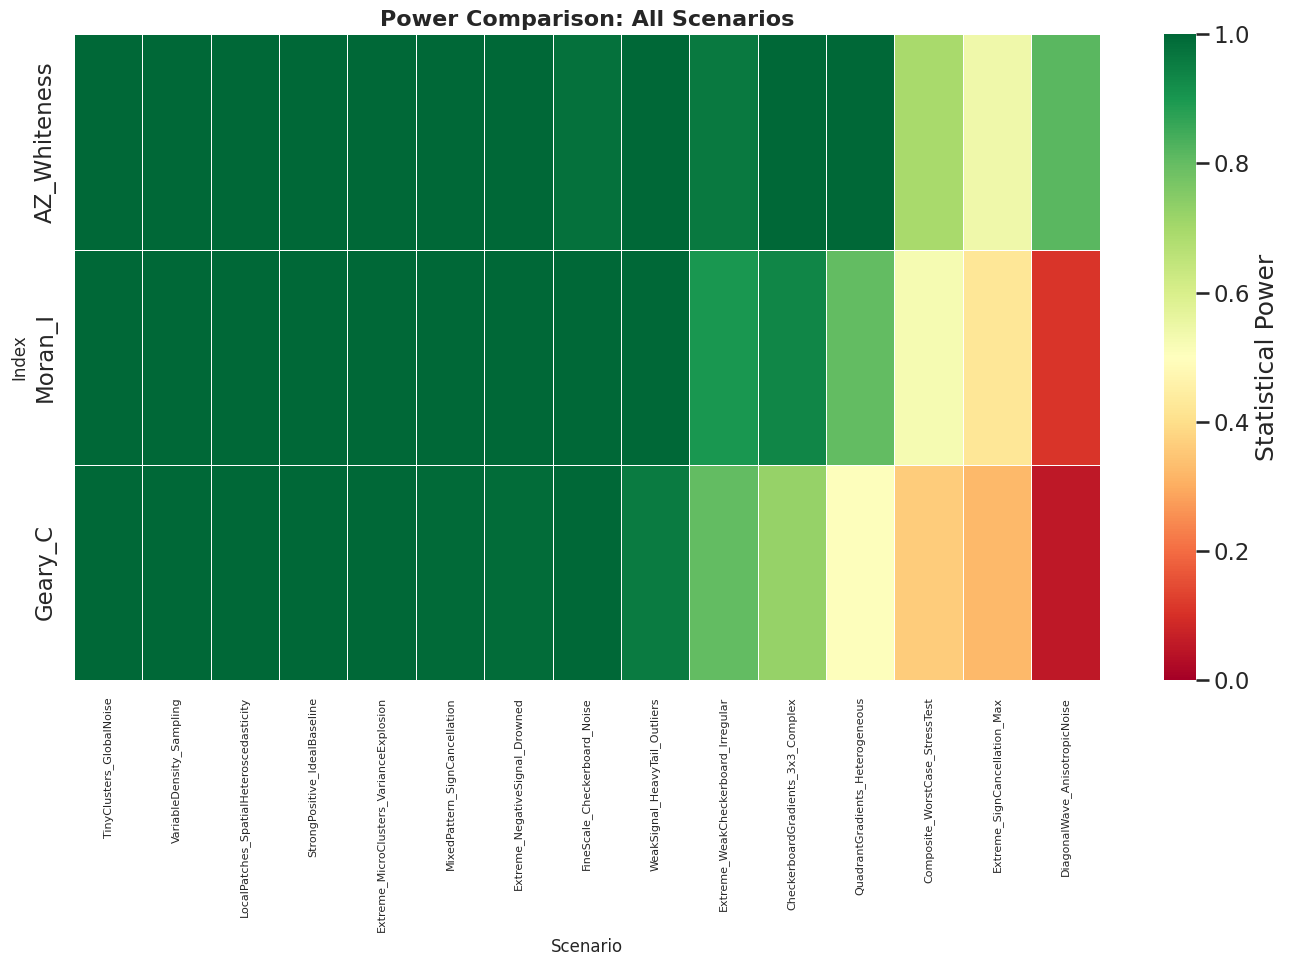

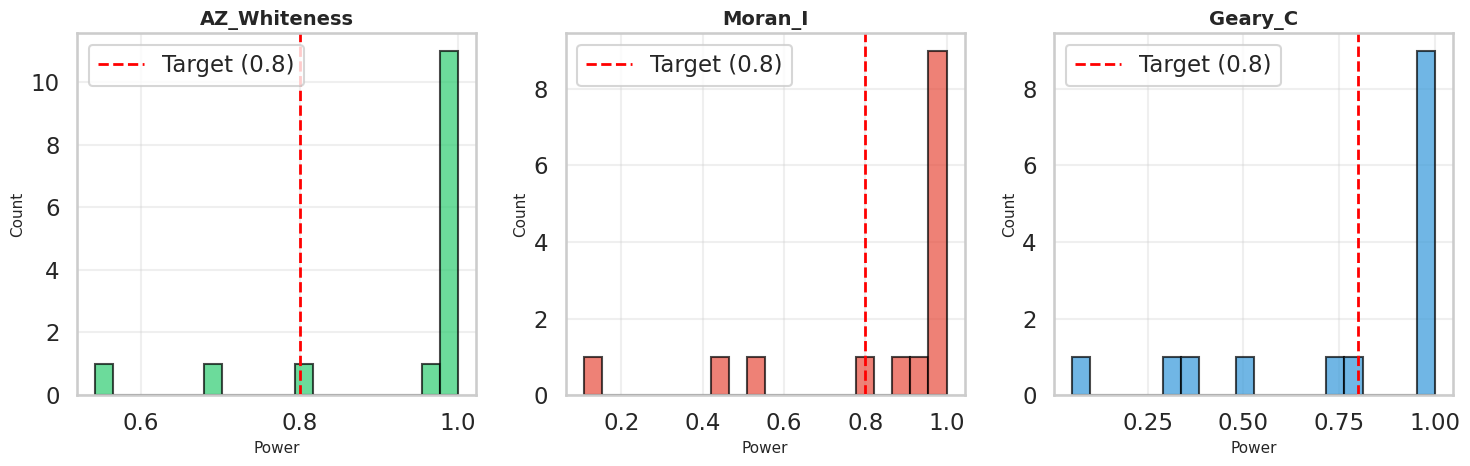

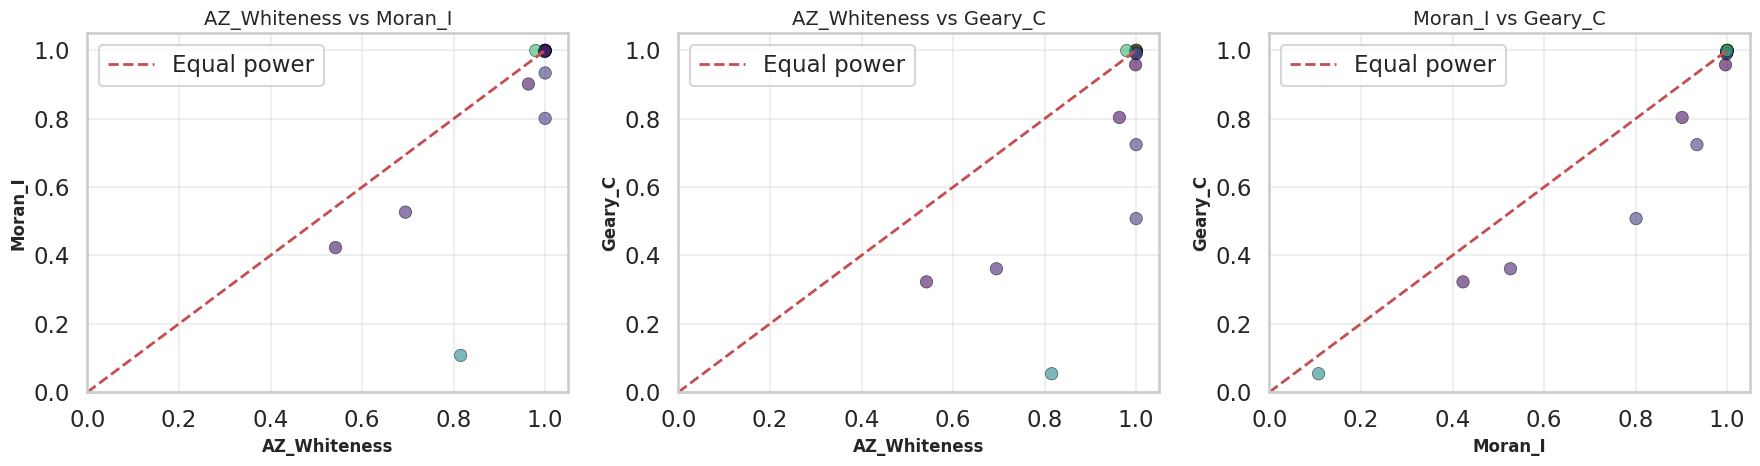

In [ ]:
# PLOT 1: Heatmap comparativa
fig, ax = plt.subplots(figsize=(14, 10))
power_matrix = power_df[power_df.index != 'OVERALL_MEAN'][index_cols]

sns.heatmap(
    power_matrix.T,  # Trasposta: indici sulle righe, scenari sulle colonne
    cmap='RdYlGn',
    vmin=0, vmax=1,
    cbar_kws={'label': 'Statistical Power'},
    linewidths=0.5,
    ax=ax
)
ax.set_title('Power Comparison: All Scenarios', fontsize=16, fontweight='bold')
ax.set_xlabel('Scenario', fontsize=12)
ax.set_ylabel('Index', fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.savefig('power_heatmap_full.png', dpi=300, bbox_inches='tight')
plt.show()

# PLOT 2: Distribuzione power per indice
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, idx in enumerate(index_cols):
    axes[i].hist(power_df[power_df.index != 'OVERALL_MEAN'][idx],
                 bins=20, alpha=0.7, color=['#2ecc71', '#e74c3c', '#3498db'][i],
                 edgecolor='black')
    axes[i].axvline(0.8, color='red', linestyle='--', linewidth=2, label='Target (0.8)')
    axes[i].set_title(f'{idx}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Power', fontsize=11)
    axes[i].set_ylabel('Count', fontsize=11)
    axes[i].legend()
    axes[i].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('power_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# PLOT 3: Scatterplot confronto diretto
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

comparisons = [
    ('AZ_Whiteness', 'Moran_I'),
    ('AZ_Whiteness', 'Geary_C'),
    ('Moran_I', 'Geary_C')
]

for i, (idx1, idx2) in enumerate(comparisons):
    data = power_df[power_df.index != 'OVERALL_MEAN']
    axes[i].scatter(data[idx1], data[idx2], s=80, alpha=0.6,
                   c=data['strength'], cmap='viridis', edgecolors='black', linewidth=0.5)

    # Linea diagonale (power uguale)
    axes[i].plot([0, 1], [0, 1], 'r--', linewidth=2, label='Equal power')

    axes[i].set_xlabel(idx1, fontsize=12, fontweight='bold')
    axes[i].set_ylabel(idx2, fontsize=12, fontweight='bold')
    axes[i].set_title(f'{idx1} vs {idx2}', fontsize=14)
    axes[i].legend()
    axes[i].grid(alpha=0.3)
    axes[i].set_xlim([0, 1.05])
    axes[i].set_ylim([0, 1.05])

plt.tight_layout()
plt.savefig('power_pairwise_comparison.png', dpi=300, bbox_inches='tight')
plt.show()